Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - 

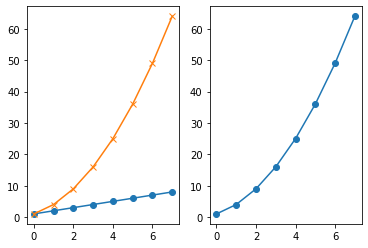

In [16]:
%matplotlib inline
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')



exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')


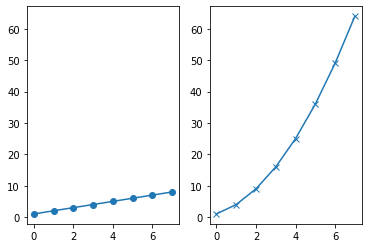

In [17]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.plot(exponential_data, '-x')

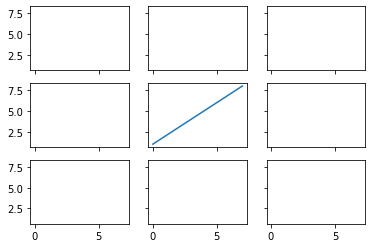

In [32]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True,sharey=True)

ax5.plot(linear_data, '-')


Histograms

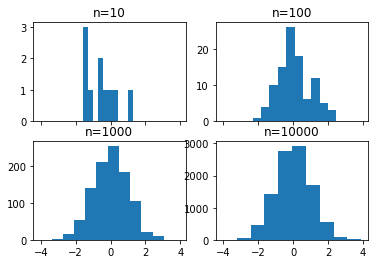

In [35]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

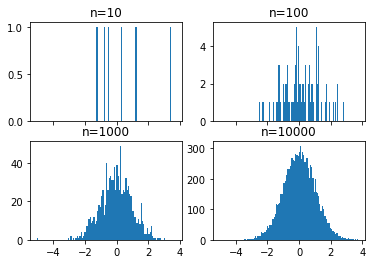

In [37]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size = sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

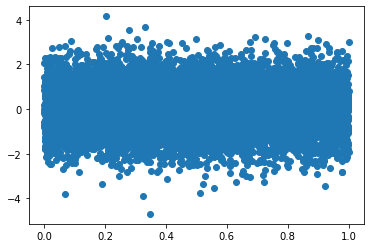

In [38]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X, Y)

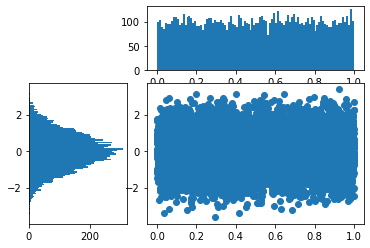

In [49]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_hist = plt.subplot(gspec[0, 1:])
side_hist = plt.subplot(gspec[1:, 0])
lower_hist = plt.subplot(gspec[1:, 1:])

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

lower_hist.scatter(X, Y)
top_hist.hist(X, bins=100)
s = side_hist.hist(Y, bins=100, orientation='horizontal')

Box Plots

Box and Whisher Plots

In [55]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [56]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.015666,0.495615,2.030722
std,1.004242,0.288297,1.447876
min,-4.165828,0.000203,0.017449
25%,-0.653940,0.245716,0.965733
50%,0.027485,0.490572,1.699082
75%,0.697912,0.746506,2.768186
max,3.641995,0.999930,16.469699


In [57]:
df.head()

,normal,random,gamma
0,0.981762,0.537431,0.560908
1,-0.976814,0.266660,1.227025
2,0.614511,0.977681,1.170960
3,-0.012013,0.366584,1.478085
4,-0.881541,0.410710,3.087718


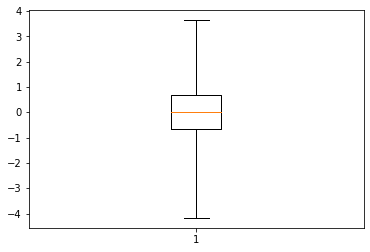

In [64]:
plt.figure()
x = plt.boxplot(df['normal'], whis=10)

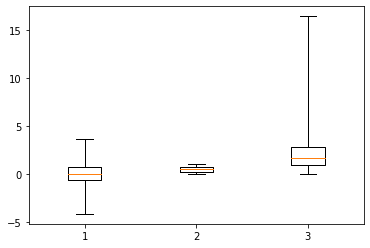

In [69]:
plt.figure()
x = plt.boxplot([df['normal'], df['random'],df['gamma']],whis=10)

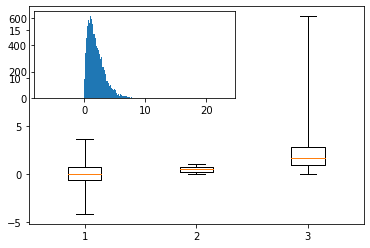

In [72]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=10)
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

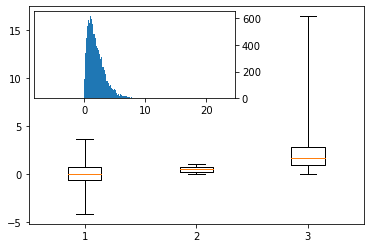

In [74]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=10)
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

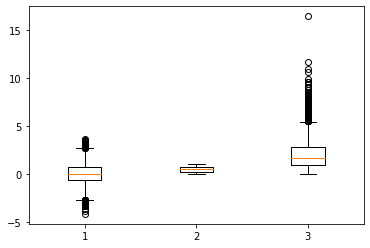

In [75]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

Heatmaps

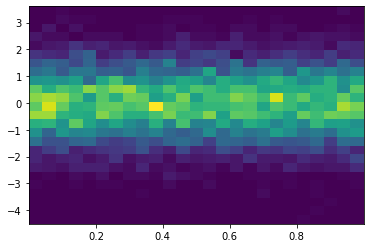

In [76]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

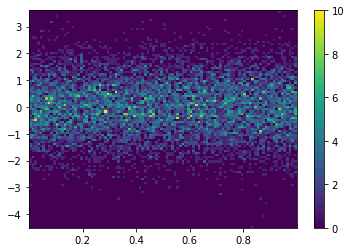

In [79]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
# add a colorbar legend
plt.colorbar()

Animation

In [87]:

import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [88]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

In [91]:

fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)
plt.show()

<IPython.core.display.Javascript object>

Interactivity

In [92]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

9

In [93]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.991616,0.426451,Chile
1,0.309055,0.782088,Mexico
2,0.737008,0.355966,China
3,0.674071,0.598132,Germany
4,0.567366,0.309495,Canada
5,0.666520,0.320195,UK
6,0.978976,0.928771,Iraq
7,0.574235,0.800045,Brazil
8,0.392036,0.379734,USA
9,0.069368,0.539454,India


In [94]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Height')

In [95]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

<IPython.core.display.Javascript object>

9

In [96]:
import pandas as pd
import numpy as np

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
                  
# Let's do the random sampling 1000 times
np.random.seed(12345)
df_means = pd.DataFrame({'means':[np.random.normal(32000,200000,3650).mean() for i in range(1000)]})
df_means.head()

# #means head ouput:
# 0	33312.107476
# 1	29723.719082
# 2	26276.149916
# 3	31267.288484
# 4	31121.673831

,means
0,33312.107476
1,29723.719082
2,26276.149916
3,31267.288484
4,31121.673831


In [97]:
df_means.std(axis=0)

# #std output:
# means    3414.816232
# dtype: float64

means    3414.816232
dtype: float64

In [98]:
# data standard deviation: 200000
# sample size: 3650
import math
200000 / math.sqrt(3650)

#output:
3310.4235544094718

3310.4235544094718